<a href="https://colab.research.google.com/github/Nooremuskan/Artificial-Intelligence-Programs/blob/main/HousePricePredictionUsingLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
    Square_Feet   Price
0          800  150000
1         1000  180000
2         1200  200000
3         1500  240000
4         1800  270000
5         2000  300000
6         2300  330000
7         2500  350000
8         2700  370000
9         3000  400000


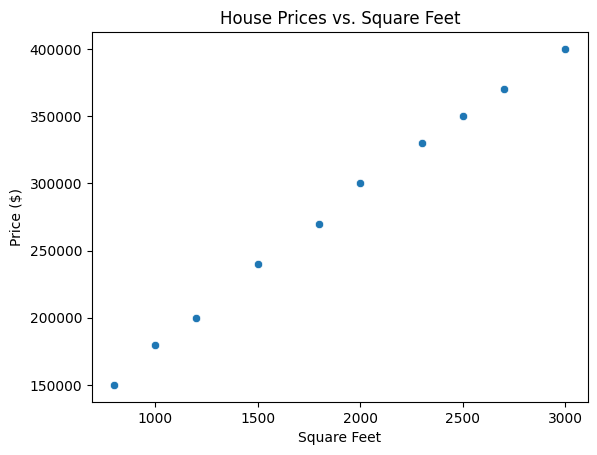


Model Evaluation:
Mean Squared Error: 4685990.70
R² Score: 0.9995

Test set predictions:
    Square_Feet  Actual_Price  Predicted_Price
1         1000        180000    178676.827156
8         2700        370000    372760.651195


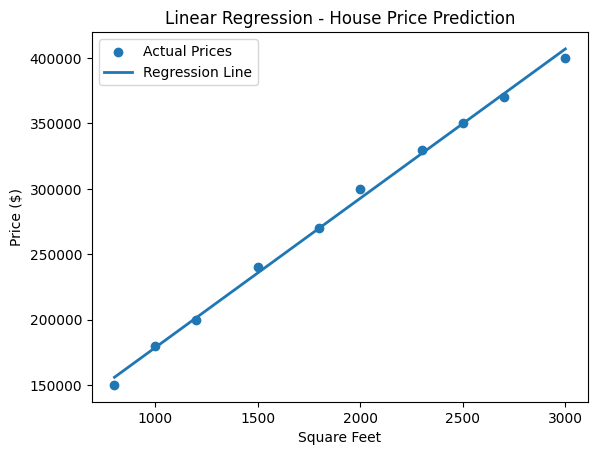


Predicted price for 2200 sq.ft house: $315,677.17

Model equation: Price = 114.17 * Square_Feet + 64509.87


In [2]:
# House price prediction (Linear Regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Create a simple dataset
data = {
    'Square_Feet': [800, 1000, 1200, 1500, 1800, 2000, 2300, 2500, 2700, 3000],
    'Price':       [150000, 180000, 200000, 240000, 270000, 300000, 330000, 350000, 370000, 400000]
}
df = pd.DataFrame(data)
print("Sample Data:\n", df)

# 2) Visualize the data
sns.scatterplot(x='Square_Feet', y='Price', data=df)
plt.title("House Prices vs. Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

# 3) Prepare features and target
X = df[['Square_Feet']]  # keep as DataFrame so column names are preserved
y = df['Price']

# 4) Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6) Predict on test set and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# show test vs predicted
results = X_test.copy()
results['Actual_Price'] = y_test.values
results['Predicted_Price'] = y_pred
print("\nTest set predictions:\n", results.sort_index())

# 7) Plot regression line using the full X range
# Create a dense set of X values for a smooth line
X_range = pd.DataFrame({'Square_Feet': np.linspace(X['Square_Feet'].min(), X['Square_Feet'].max(), 100)})
y_range_pred = model.predict(X_range)

plt.scatter(X, y, label="Actual Prices")
plt.plot(X_range, y_range_pred, label="Regression Line", linewidth=2)
plt.title("Linear Regression - House Price Prediction")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# 8) Predict a new house price (fixed - keep DataFrame format)
new_sqft = 2200
new_X = pd.DataFrame({'Square_Feet': [new_sqft]})   # <- keep feature name consistent
predicted_price = model.predict(new_X)
print(f"\nPredicted price for {new_sqft} sq.ft house: ${predicted_price[0]:,.2f}")

# 9) (Optional) Show model coefficients
coef = model.coef_[0]
intercept = model.intercept_
print(f"\nModel equation: Price = {coef:.2f} * Square_Feet + {intercept:.2f}")